In [51]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb
import seaborn as sns
from functools import reduce

In [2]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 20000
pd.options.display.max_columns= 2000

In [4]:

#the %%capture makes sure not the whole of last assignment is printed here

#This imports dataframes from other code.
%run "Dataframes.ipynb"

Deaths  has  263862  entries
Vaccination  has  210103  entries
Demographics  has  643  entries
Age  has  617  entries
Hospitals  has  552  entries
The keys of the dataframes are: 

Deaths :
length:  263862
Index(['pc11_state_id', 'pc11_district_id', 'date', 'total_cases',
       'total_deaths'],
      dtype='object')
Vaccination :
length:  210103
Index(['lgd_state_id', 'lgd_state_name', 'lgd_district_id',
       'lgd_district_name', 'date', 'total_individuals_registered',
       'total_sessions_conducted', 'total_sites', 'total_covaxin',
       'total_covishield', 'first_dose_admin', 'second_dose_admin', 'male_vac',
       'female_vac', 'trans_vac', 'state', 'district', 'bad_flg_covishield',
       'bad_flg_covaxin'],
      dtype='object')
Demographics :
length:  643
Index(['pc11_state_id', 'pc11_district_id', 'pc11_urb_share', 'pc11_slum_pop',
       'pc11_vd_area', 'pc11_td_area', 'pc11_tot_area', 'pc11_pop_dens',
       'pc11r_pca_tot_p', 'pc11u_pca_tot_p', 'pc11_pca_tot_p',
       

In [5]:
hosp_frame

,pc11_state_id,censuscode,dlhs4_dh_beds,dlhs4_dh_count,dlhs4_dh_staff,dlhs4_dh_icu_beds,dlhs4_chc_beds,dlhs4_chc_count,dlhs4_chc_staff,dlhs4_chc_beds_ven,dlhs4_phc_beds,dlhs4_phc_count,dlhs4_phc_staff,dlhs4_phc_pop,dlhs4_phc_beds_oxy,pc11_pca_tot_p,dlhs4_phc_mult,dlhs4_total_beds,dlhs4_total_staff,dlhs4_total_facilities
1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,34.0,636,171.0,1.0,1429.0,21.0,30.0,1.0,181.0,0.0,1.0,1.0,119.0,2810.0,0.0,41816.0,14.881139,215.88113,3380.85550,16.881138
639,34.0,637,0.0,0.0,0.0,NaN,62.0,3.0,63.0,0.0,30.0,7.0,95.0,67220.0,30.0,200222.0,2.978608,151.35823,345.96771,23.850254
640,35.0,638,53.0,1.0,41.0,0.0,5.0,1.0,56.0,0.0,61.0,4.0,74.0,13991.0,51.0,36842.0,2.633264,218.62912,291.86157,12.533057
641,35.0,639,70.0,1.0,81.0,0.0,145.0,2.0,81.0,0.0,90.0,7.0,104.0,41395.0,90.0,105597.0,2.550960,444.58643,427.29987,20.856722


In [6]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [7]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [8]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [9]:
type(india_s_masters["censuscode"])

pandas.core.series.Series

In [10]:
type(hosp_frame["censuscode"])

pandas.core.series.Series

In [11]:
type(hosp_frame)

pandas.core.frame.DataFrame

In [12]:
demog_frame = demog_frame.rename(columns={'pc11_district_id' : 'censuscode'})
demog_frame

,pc11_state_id,censuscode,pc11_urb_share,pc11_slum_pop,pc11_vd_area,pc11_td_area,pc11_tot_area,pc11_pop_dens,pc11r_pca_tot_p,pc11u_pca_tot_p,pc11_pca_tot_p,pc11r_pca_tot_m,pc11u_pca_tot_m,pc11_pca_tot_m,pc11r_pca_tot_f,pc11u_pca_tot_f,pc11_pca_tot_f,pc11r_pca_p_lit,pc11u_pca_p_lit,pc11_pca_p_lit,pc11r_pca_m_lit,pc11u_pca_m_lit,pc11_pca_m_lit,pc11r_pca_f_lit,pc11u_pca_f_lit,pc11_pca_f_lit,pc11r_pca_p_sc,pc11u_pca_p_sc,pc11_pca_p_sc,pc11r_pca_m_sc,pc11u_pca_m_sc,pc11_pca_m_sc,pc11r_pca_f_sc,pc11u_pca_f_sc,pc11_pca_f_sc,pc11r_pca_p_st,pc11u_pca_p_st,pc11_pca_p_st,pc11r_pca_m_st,pc11u_pca_m_st,pc11_pca_m_st,pc11r_pca_f_st,pc11u_pca_f_st,pc11_pca_f_st
0,1,0,NaN,0.000000,0.000000,316.3100,316.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.120329,20475.000000,615.953702,47.3400,663.293700,1312.16980,765625.0,104729.0,870354.0,412038.0,62152.0,474190.0,353587.0,42577.0,396164.0,374998.0,64656.0,439654.0,238785.0,44038.0,282823.0,136213.0,20618.0,156831.0,872.0,176.0,1048.0,870.0,176.0,1046.0,2.0,0.0,2.0,68491.0,1861.0,70352.0,35855.0,1058.0,36913.0,32636.0,803.0,33439.0
2,1,2,0.129901,37610.903809,672.810101,43.6800,716.490110,1051.99630,655833.0,97912.0,753745.0,343385.0,54656.0,398041.0,312448.0,43256.0,355704.0,278265.0,57384.0,335649.0,170641.0,37100.0,207741.0,107624.0,20284.0,127908.0,86.0,282.0,368.0,78.0,265.0,343.0,8.0,17.0,25.0,23293.0,619.0,23912.0,12025.0,358.0,12383.0,11268.0,261.0,11529.0
3,1,3,0.342138,7763.000000,369.884999,24.0100,393.894990,338.88980,87816.0,45671.0,133487.0,48411.0,30560.0,78971.0,39405.0,15111.0,54516.0,56789.0,36981.0,93770.0,36062.0,26772.0,62834.0,20727.0,10209.0,30936.0,108.0,380.0,488.0,89.0,355.0,444.0,19.0,25.0,44.0,73789.0,22068.0,95857.0,36318.0,11225.0,47543.0,37471.0,10843.0,48314.0
4,1,4,0.116035,0.000000,186.618100,2.1400,188.758100,745.93884,124464.0,16338.0,140802.0,67703.0,10082.0,77785.0,56761.0,6256.0,63017.0,73896.0,12340.0,86236.0,47674.0,8627.0,56301.0,26222.0,3713.0,29935.0,10.0,8.0,18.0,5.0,7.0,12.0,5.0,1.0,6.0,110840.0,11496.0,122336.0,56693.0,5959.0,62652.0,54147.0,5537.0,59684.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,34,636,1.000000,4059.000000,0.000000,9.0000,9.000000,4646.22220,0.0,41816.0,41816.0,0.0,19143.0,19143.0,0.0,22673.0,22673.0,0.0,36470.0,36470.0,0.0,16610.0,16610.0,0.0,19860.0,19860.0,0.0,144.0,144.0,0.0,77.0,77.0,0.0,67.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
639,34,637,0.489966,26890.000000,121.650500,38.3000,159.950500,1251.77480,102120.0,98102.0,200222.0,50138.0,47671.0,97809.0,51982.0,50431.0,102413.0,77101.0,77815.0,154916.0,40216.0,39687.0,79903.0,36885.0,38128.0,75013.0,24801.0,10547.0,35348.0,12113.0,5093.0,17206.0,12688.0,5454.0,18142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,35,638,0.000000,0.000000,69.906901,0.0000,69.906898,527.01520,36842.0,0.0,36842.0,20727.0,0.0,20727.0,16115.0,0.0,16115.0,25332.0,0.0,25332.0,15397.0,0.0,15397.0,9935.0,0.0,9935.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23681.0,0.0,23681.0,12198.0,0.0,12198.0,11483.0,0.0,11483.0
641,35,639,0.025957,0.000000,401.905198,5.9500,407.855190,258.90808,102856.0,2741.0,105597.0,53457.0,1404.0,54861.0,49399.0,1337.0,50736.0,76621.0,2062.0,78683.0,42056.0,1130.0,43186.0,34565.0,932.0,35497.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,10.0,758.0,410.0,5.0,415.0,338.0,5.0,343.0


In [13]:
age_frame = age_frame.rename(columns={'pc11_district_id' : 'censuscode'})
age_frame

,pc11_state_id,censuscode,sector_present,pc11_pca_tot_u,pc11_pca_tot_r,pc11_pca_tot_t,age_0_r_share,age_5_r_share,age_10_r_share,age_15_r_share,age_20_r_share,age_25_r_share,age_30_r_share,age_35_r_share,age_40_r_share,age_45_r_share,age_50_r_share,age_55_r_share,age_60_r_share,age_65_r_share,age_70_r_share,age_75_r_share,age_80_r_share,age_85_r_share,age_0_u_share,age_5_u_share,age_10_u_share,age_15_u_share,age_20_u_share,age_25_u_share,age_30_u_share,age_35_u_share,age_40_u_share,age_45_u_share,age_50_u_share,age_55_u_share,age_60_u_share,age_65_u_share,age_70_u_share,age_75_u_share,age_80_u_share,age_85_u_share,age_0_r,age_0_u,age_0_t,age_0_t_share,age_5_r,age_5_u,age_5_t,age_5_t_share,age_10_r,age_10_u,age_10_t,age_10_t_share,age_15_r,age_15_u,age_15_t,age_15_t_share,age_20_r,age_20_u,age_20_t,age_20_t_share,age_25_r,age_25_u,age_25_t,age_25_t_share,age_30_r,age_30_u,age_30_t,age_30_t_share,age_35_r,age_35_u,age_35_t,age_35_t_share,age_40_r,age_40_u,age_40_t,age_40_t_share,age_45_r,age_45_u,age_45_t,age_45_t_share,age_50_r,age_50_u,age_50_t,age_50_t_share,age_55_r,age_55_u,age_55_t,age_55_t_share,age_60_r,age_60_u,age_60_t,age_60_t_share,age_65_r,age_65_u,age_65_t,age_65_t_share,age_70_r,age_70_u,age_70_t,age_70_t_share,age_75_r,age_75_u,age_75_t,age_75_t_share,age_80_r,age_80_u,age_80_t,age_80_t_share,age_85_r,age_85_u,age_85_t,age_85_t_share
0,1,1,3 urban and rural,104729,765625,870354,0.114430,0.137691,0.127619,0.105311,0.094734,0.076199,0.070968,0.056568,0.054878,0.037909,0.035149,0.021251,0.025520,0.013705,0.014545,0.004885,0.005368,0.003271,0.072273,0.110780,0.115862,0.109412,0.107604,0.085321,0.075596,0.063673,0.065676,0.047205,0.044273,0.029173,0.028196,0.015442,0.015149,0.006157,0.005522,0.002688,87610,7569,95179,0.109357,105419,11602,117021,0.134452,97708,12134,109842,0.126204,80628,11459,92087,0.105804,72531,11269,83800,0.096283,58340,8936,67276,0.077297,54335,7917,62252,0.071525,43310,6668,49978,0.057423,42016,6878,48894,0.056177,29024,4944,33968,0.039028,26911,4637,31548,0.036247,16270,3055,19325,0.022204,19539,2953,22492,0.025842,10493,1617,12110,0.013914,11136,1586,12722,0.014617,3740,645,4385,0.005038,4110,578,4688,0.005386,2505,281,2786,0.003201
1,1,2,3 urban and rural,97912,655833,753745,0.124514,0.145426,0.119529,0.102073,0.091688,0.075084,0.065477,0.057129,0.054556,0.041743,0.035272,0.023231,0.024386,0.014274,0.013960,0.005166,0.004265,0.002228,0.139958,0.163951,0.121070,0.087038,0.088825,0.067980,0.067214,0.055175,0.056281,0.039775,0.031693,0.019696,0.022844,0.013485,0.013911,0.005147,0.003871,0.002084,81661,13704,95365,0.126522,95375,16053,111428,0.147832,78391,11854,90245,0.119729,66943,8522,75465,0.100120,60132,8697,68829,0.091316,49243,6656,55899,0.074162,42942,6581,49523,0.065703,37467,5402,42869,0.056875,35779,5511,41290,0.054780,27376,3894,31270,0.041486,23133,3103,26236,0.034808,15235,1929,17164,0.022772,15993,2237,18230,0.024186,9361,1320,10681,0.014171,9155,1362,10517,0.013953,3388,504,3892,0.005164,2797,379,3176,0.004214,1461,204,1665,0.002209
2,1,3,3 urban and rural,45671,87816,133487,0.068943,0.086203,0.090310,0.093675,0.095936,0.100590,0.086290,0.076797,0.061886,0.052076,0.044166,0.039360,0.031757,0.023738,0.020395,0.012956,0.009340,0.005582,0.045660,0.069852,0.080885,0.086734,0.092184,0.093048,0.090257,0.090921,0.077097,0.072112,0.052639,0.047122,0.038216,0.023927,0.016948,0.010501,0.005649,0.006248,6054,2085,8139,0.060972,7570,3190,10760,0.080607,7931,3694,11625,0.087087,8226,3961,12187,0.091297,8425,4210,12635,0.094653,8833,4250,13083,0.098010,7578,4122,11700,0.087649,6744,4152,10896,0.081626,5435,3521,8956,0.067093,4573,3293,7866,0.058927,3879,2404,6283,0.047068,3456,2152,5608,0.042012,2789,1745,4534,0.033966,2085,1093,3178,0.023808,1791,774,2565,0.019215,1138,480,1618,0.012121,820,258,1078,0.008076,490,285,775,0.005806
3,1,4,3 urban and rural,16338,124464,140802,0.083229,0.118205,0.112861,0.111868,0.106164,0.099376,0.074627,0.062532,0.048722,0.048966,0.038261,0.026897,0.024812,0.0163

<AxesSubplot:>

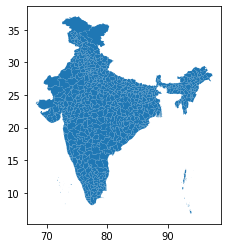

In [14]:
india_s_masters.plot()

In [15]:
##for joining two files
india_joined = india_s_masters.merge(demog_frame,on='censuscode').merge(hosp_frame,on='censuscode')
india_joined.head(2)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,pc11_state_id_x,pc11_urb_share,pc11_slum_pop,pc11_vd_area,pc11_td_area,pc11_tot_area,pc11_pop_dens,pc11r_pca_tot_p,pc11u_pca_tot_p,pc11_pca_tot_p_x,pc11r_pca_tot_m,pc11u_pca_tot_m,pc11_pca_tot_m,pc11r_pca_tot_f,pc11u_pca_tot_f,pc11_pca_tot_f,pc11r_pca_p_lit,pc11u_pca_p_lit,pc11_pca_p_lit,pc11r_pca_m_lit,pc11u_pca_m_lit,pc11_pca_m_lit,pc11r_pca_f_lit,pc11u_pca_f_lit,pc11_pca_f_lit,pc11r_pca_p_sc,pc11u_pca_p_sc,pc11_pca_p_sc,pc11r_pca_m_sc,pc11u_pca_m_sc,pc11_pca_m_sc,pc11r_pca_f_sc,pc11u_pca_f_sc,pc11_pca_f_sc,pc11r_pca_p_st,pc11u_pca_p_st,pc11_pca_p_st,pc11r_pca_m_st,pc11u_pca_m_st,pc11_pca_m_st,pc11r_pca_f_st,pc11u_pca_f_st,pc11_pca_f_st,pc11_state_id_y,dlhs4_dh_beds,dlhs4_dh_count,dlhs4_dh_staff,dlhs4_dh_icu_beds,dlhs4_chc_beds,dlhs4_chc_count,dlhs4_chc_staff,dlhs4_chc_beds_ven,dlhs4_phc_beds,dlhs4_phc_count,dlhs4_phc_staff,dlhs4_phc_pop,dlhs4_phc_beds_oxy,pc11_pca_tot_p_y,dlhs4_phc_mult,dlhs4_total_beds,dlhs4_total_staff,dlhs4_total_facilities
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",28,0.277341,303312.000977,14544.070000,353.70,14897.7700,184.00331,1980980.0,760259.0,2741239.0,985303.0,384294.0,1369597.0,995677.0,375965.0,1371642.0,965707.0,517640.0,1483347.0,569033.0,287317.0,856350.0,396674.0,230323.0,626997.0,368490.0,120106.0,488596.0,182451.0,60393.0,242844.0,186039.0,59713.0,245752.0,463089.0,32705.0,495794.0,231551.0,15921.0,247472.0,231538.0,16784.0,248322.0,28.0,620.0,4.0,299.0,14.0,326.0,10.0,188.0,0.0,243.0,28.0,401.0,1073156.0,132.0,2741239.0,2.554371,1566.7123,1511.30290,85.52240
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",9,0.458087,533554.000000,3840.385239,247.96,4088.3452,1080.82780,2394602.0,2024195.0,4418797.0,1285184.0,1079769.0,2364953.0,1109418.0,944426.0,2053844.0,1401109.0,1279401.0,2680510.0,882241.0,732353.0,1614594.0,518868.0,547048.0,1065916.0,505140.0,486185.0,991325.0,270558.0,261083.0,531641.0,234582.0,225102.0,459684.0,1113.0,6142.0,7255.0,565.0,3262.0,3827.0,548.0,2880.0,3428.0,9.0,308.0,2.0,188.0,16.0,406.0,19.0,285.0,0.0,70.0,18.0,93.0,914377.0,20.0,4418797.0,4.832577,1052.2804,922.42963,107.98638


In [16]:
common_columns = india_joined.columns & interesting_frame['code']
common_columns

C:\Users\Arno\AppData\Local\Temp/ipykernel_16772/3762801443.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  common_columns = india_joined.columns & interesting_frame['code']


Index(['pc11_urb_share', 'pc11_slum_pop', 'pc11_pop_dens', 'pc11_pca_p_lit',
       'dlhs4_dh_icu_beds', 'dlhs4_total_beds', 'dlhs4_total_facilities'],
      dtype='object')

In [17]:
df = pd.DataFrame(np.random.randint(0,100,size=(641, 1)))

In [18]:
india_s_masters['random'] = df

In [19]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",34
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",37
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",38
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",81
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",86


In [20]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [28]:
columns_to_plot = common_columns

In [29]:
india_joined[common_columns]

,pc11_urb_share,pc11_slum_pop,pc11_pop_dens,pc11_pca_p_lit,dlhs4_dh_icu_beds,dlhs4_total_beds,dlhs4_total_facilities
0,0.277341,303312.000977,184.00331,1483347.0,14.0,1566.71230,85.522400
1,0.458087,533554.000000,1080.82780,2680510.0,16.0,1052.28040,107.986380
2,0.840429,257180.995117,912.97119,5435760.0,NaN,NaN,NaN
3,0.200877,104483.000000,264.20233,3151890.0,16.0,1405.50210,125.941830
4,0.786278,78561.000000,1795.10770,340595.0,5.0,935.88641,57.488644
...,...,...,...,...,...,...,...
635,0.098494,12919.000000,265.48596,490036.0,NaN,NaN,NaN
636,0.000000,0.000000,527.01520,25332.0,0.0,218.62912,12.533057
637,0.591021,14172.000000,634.09247,190266.0,10.0,766.36798,25.336796
638,0.025957,0.000000,258.90808,78683.0,0.0,444.58643,20.856722


<AxesSubplot:>

Text(0.5, 1.0, 'pc11_urb_share')

<AxesSubplot:>

Text(0.5, 1.0, 'pc11_slum_pop')

<AxesSubplot:>

Text(0.5, 1.0, 'pc11_pop_dens')

<AxesSubplot:>

Text(0.5, 1.0, 'pc11_pca_p_lit')

<AxesSubplot:>

Text(0.5, 1.0, 'dlhs4_dh_icu_beds')

<AxesSubplot:>

Text(0.5, 1.0, 'dlhs4_total_beds')

<AxesSubplot:>

Text(0.5, 1.0, 'dlhs4_total_facilities')

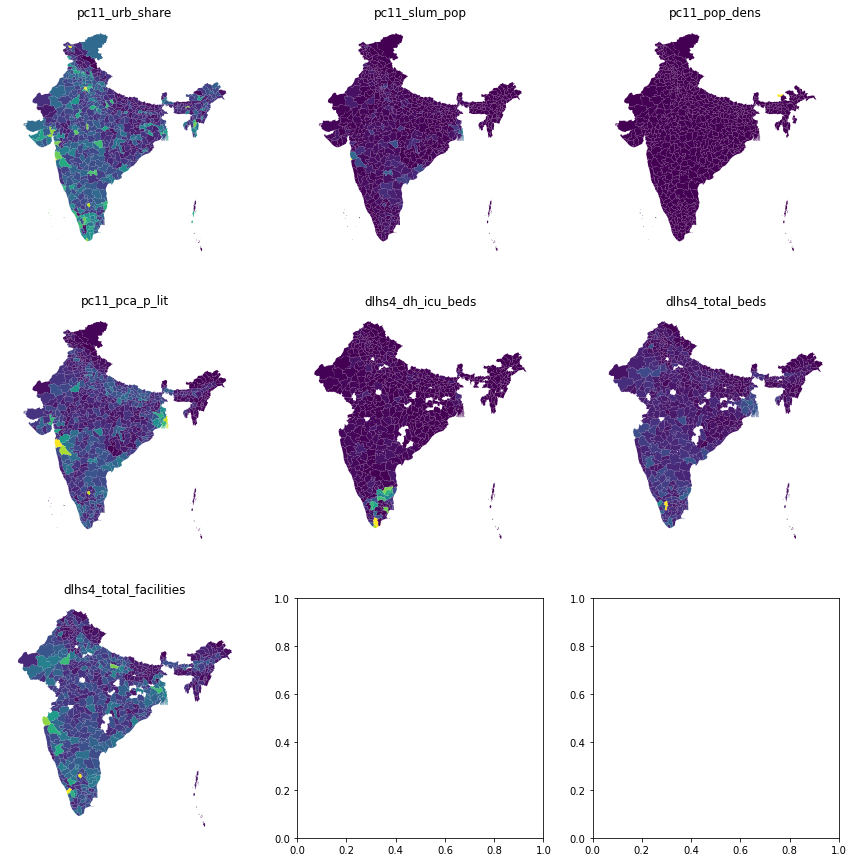

In [31]:
f, axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [41]:
column = ['pc11_pop_dens']

<AxesSubplot:>

Text(0.5, 1.0, 'pc11_pop_dens')

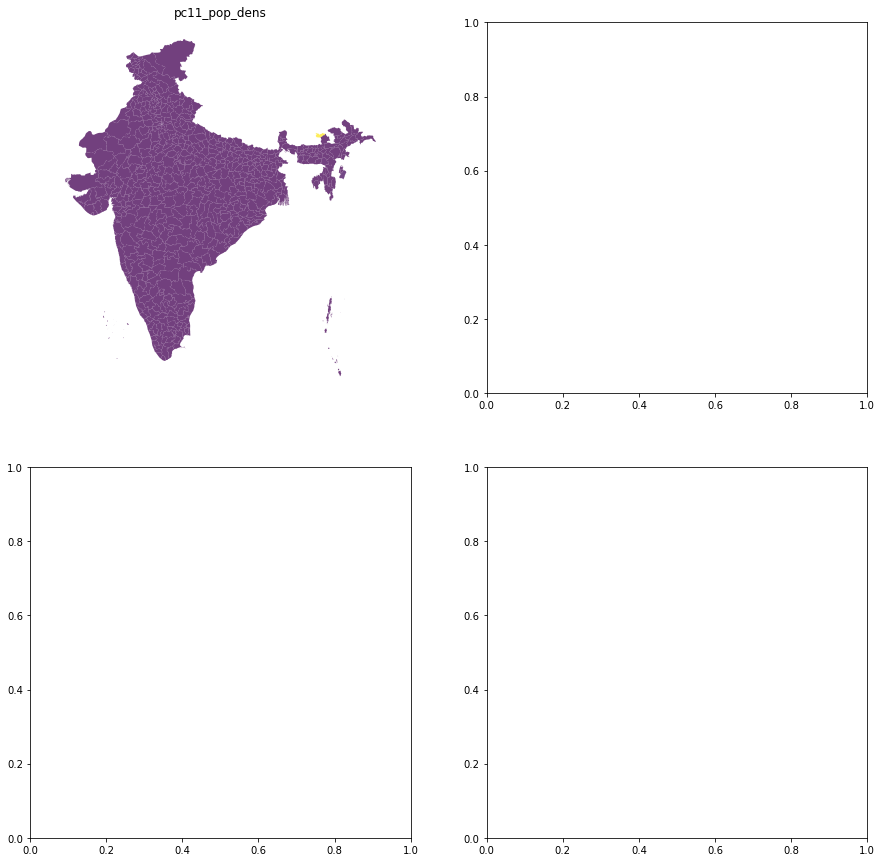

In [49]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(column):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 0.75)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

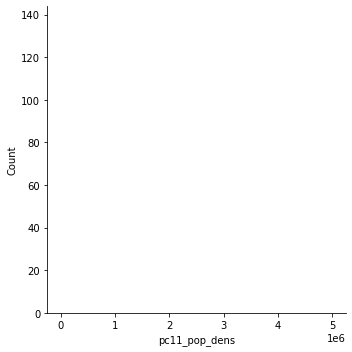

In [53]:
sns.displot(data = india_joined, x = 'pc11_pop_dens')

In [77]:
column = india_joined["pc11_pop_dens"]
max_index = column.idxmax()
max_index

558

In [78]:
india_joined.loc(axis=0)[558]['pc11_pop_dens']

4997700.0

In [79]:
india_joined.loc(axis=0)[558]

DISTRICT                              Tawang
ST_NM                     Arunanchal Pradesh
ST_CEN_CD                                 12
DT_CEN_CD                                  1
censuscode                               245
                                 ...        
pc11_pca_tot_p_y                     49977.0
dlhs4_phc_mult                      3.021219
dlhs4_total_beds                   132.63657
dlhs4_total_staff                  88.297066
dlhs4_total_facilities             17.106094
Name: 558, Length: 68, dtype: object

In [75]:
india_joined['pc11_pop_dens'].median()

455.55215

In [71]:
india_joined[common_columns].loc(axis=0)[558]

pc11_urb_share            2.241431e-01
pc11_slum_pop             0.000000e+00
pc11_pop_dens             4.997700e+06
pc11_pca_p_lit            2.607300e+04
dlhs4_dh_icu_beds         0.000000e+00
dlhs4_total_beds          1.326366e+02
dlhs4_total_facilities    1.710609e+01
Name: 558, dtype: float64

In [32]:
india_s_masters.sort_values(by='censuscode', ascending=False)


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",8
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",56
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",76
633,Karaikal,Puducherry,34,4,637,"POLYGON ((79.76528 10.99681, 79.76963 10.99519...",21
353,Mahe,Puducherry,34,3,636,"MULTIPOLYGON (((75.54502 11.73396, 75.55523 11...",15
...,...,...,...,...,...,...,...
450,Punch,Jammu & Kashmir,1,5,5,"POLYGON ((74.32009 33.95562, 74.32773 33.94523...",19
283,Kargil,Jammu & Kashmir,1,4,4,"POLYGON ((76.66040 34.38012, 76.67459 34.32414...",0
338,Leh (ladakh),Jammu & Kashmir,1,3,3,"POLYGON ((79.38467 35.99429, 79.38682 35.99047...",15
31,Badgam,Jammu & Kashmir,1,2,2,"POLYGON ((74.82323 34.04905, 74.82835 34.04648...",0
